# Keras API Loan Prediction Project 

## Table Of Contents : 

* Section 1: Introduction
    *  1.1 Import Libraries
    *  1.2 Loading the Data
* Section 2: Exploratory Data Analysis  
* Section 3: Data PreProcessing
    * 3.1 Handling Missing Data
    * 3.2 Explore Categorical Features 
    * 3.3 Convert Categoric Features to Numeric 
    * 3.4 Train Test Split
    * 3.5 Normalizing the Data 
* Section 4: Creating the Model
* Section 5: Evaluating Model Performance 
* Section 6: Predictions



# Section 1: Introduction

## The Data

We will be using a **subset** of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

## Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

pd.options.display.max_rows =100
pd.options.display.max_columns = 100

In [2]:
# get data information
data_info = pd.read_csv('../data/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feature_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feature_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


## 1.2 Loading the Data 

In [6]:
#load data
df = pd.read_csv('../data/lending_club_loan_two.csv')

In [7]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 2: Exploratory Data Analysis

**Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

<AxesSubplot:xlabel='loan_status', ylabel='count'>

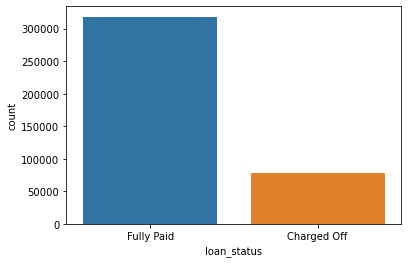

In [8]:
# loan_status distribution
sns.countplot(data = df, x='loan_status')

(0.0, 45000.0)

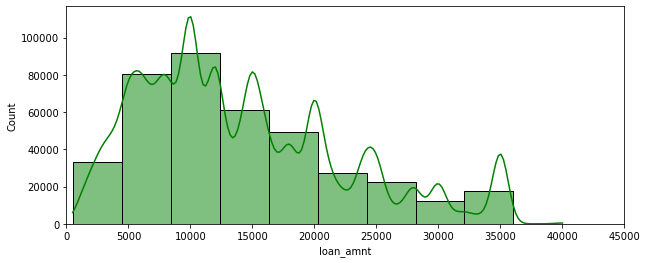

In [9]:
# loan_amt distributions
plt.figure(figsize=(10,4))
sns.histplot(data=df['loan_amnt'],kde=True,bins=10, color='green')
plt.xlim(0,45000)

In [10]:
# Explore correlation between the continuous feature variables.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

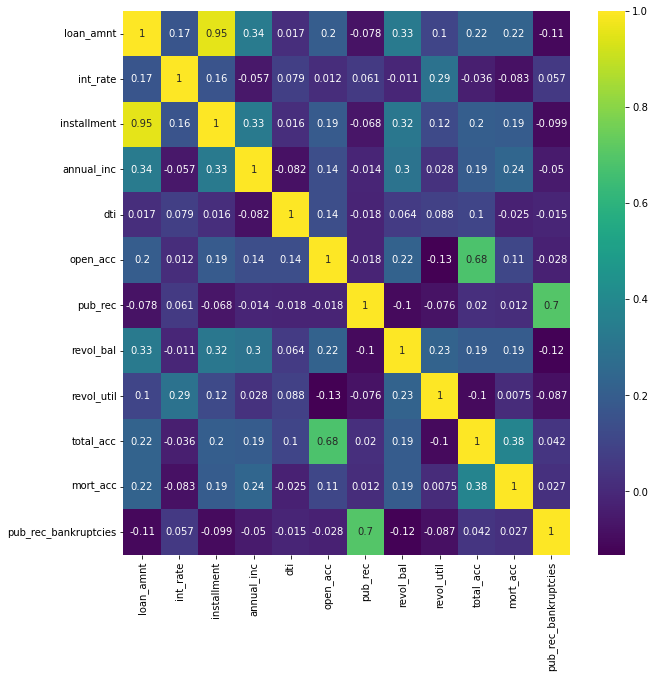

In [11]:
# visualize correlation using a heatmap.
# [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
# [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**NOTE:Almost perfect correlation with the "installment" feature. We will explore this feature further by printing out their descriptions and perform a scatterplot between them.**

In [12]:
feature_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

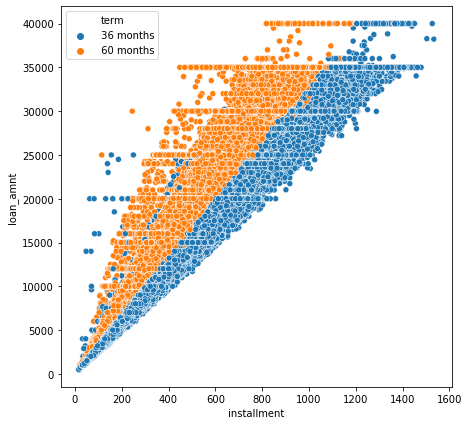

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df, hue='term')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

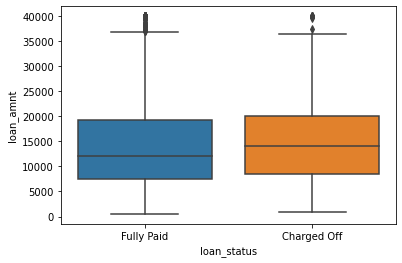

In [15]:
sns.boxplot(data=df, x='loan_status', y='loan_amnt')

In [16]:
# get the summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
# explore grade and sub_grade
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [18]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [19]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

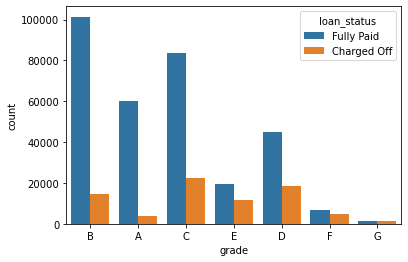

In [20]:
sns.countplot(x = df['grade'], hue=df['loan_status'])

<AxesSubplot:ylabel='count'>

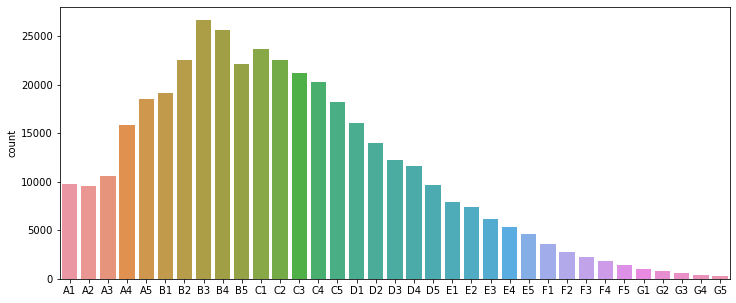

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x=sorted(df['sub_grade']))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

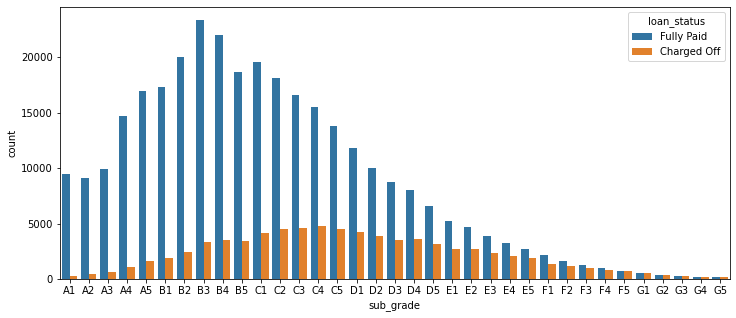

In [22]:
plt.figure(figsize=(12,5))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order = subgrade_order,hue='loan_status')

**NOTE: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

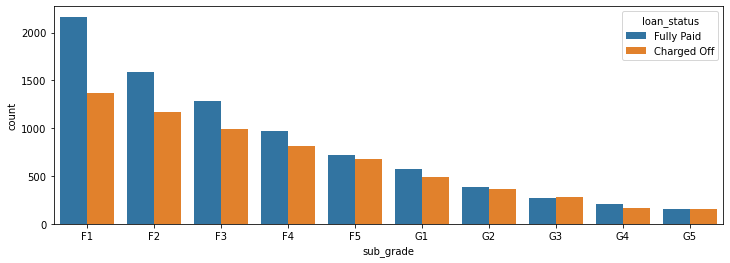

In [23]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [24]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

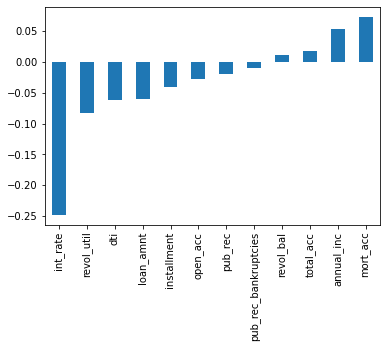

In [26]:
# check the corr with loan_repaid
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 3: Data PreProcessing

**Section Goals:** 
* Remove or fill any missing data.
* Remove unnecessary or repetitive features.
* Convert categorical string features to dummy variables.



In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


## 3.1 Handling Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [28]:
len(df)

396030

In [29]:
#check missing value counts
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
# check missing value percentage
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [31]:
# check missing data in emp_title and emp_length
feature_info('emp_title')
feature_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [32]:
len(df['emp_title'].unique())

173106

In [33]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [34]:
# there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.
df.drop('emp_title', axis=1, inplace=True)

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

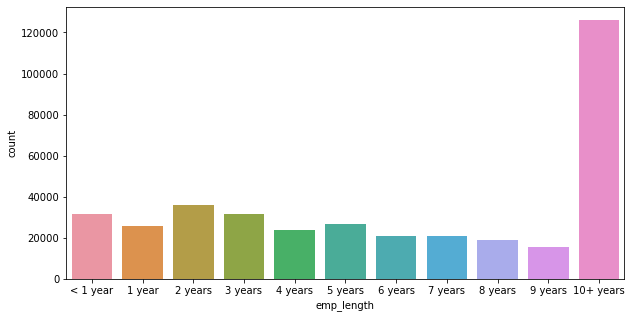

In [37]:
# distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'emp_length',order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

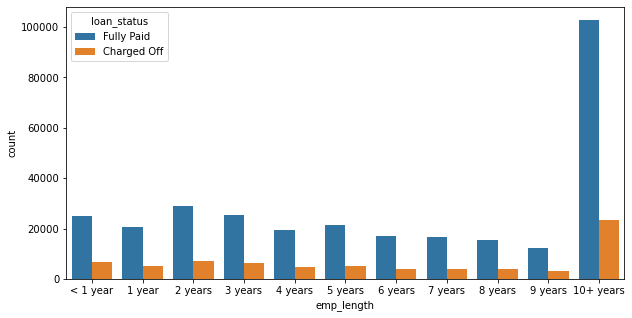

In [38]:
# distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'emp_length',order=emp_length_order, hue = 'loan_status') 

**NOTE: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).**

In [39]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [40]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [41]:
loan_status_percentage = emp_co/emp_fp

<AxesSubplot:xlabel='emp_length'>

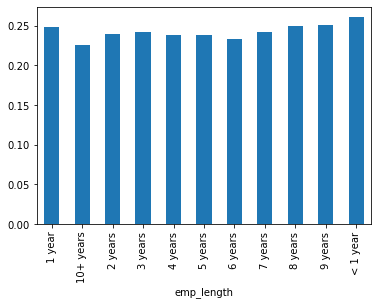

In [42]:
loan_status_percentage.plot(kind='bar')

**NOTE: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [43]:
df.drop('emp_length', axis=1, inplace=True)

In [44]:
df.isnull().sum().sort_values()

loan_amnt                   0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
dti                         0
address                     0
purpose                     0
loan_repaid                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
loan_status                 0
revol_util                276
pub_rec_bankruptcies      535
title                    1755
mort_acc                37795
dtype: int64

**Check the title column vs the purpose column. Is this repeated information?**

In [45]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [46]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**NOTE: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [47]:
df.drop('title',axis=1, inplace=True)

In [48]:
feature_info('mort_acc')

Number of mortgage accounts.


In [49]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**NOTE: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [50]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

<AxesSubplot:>

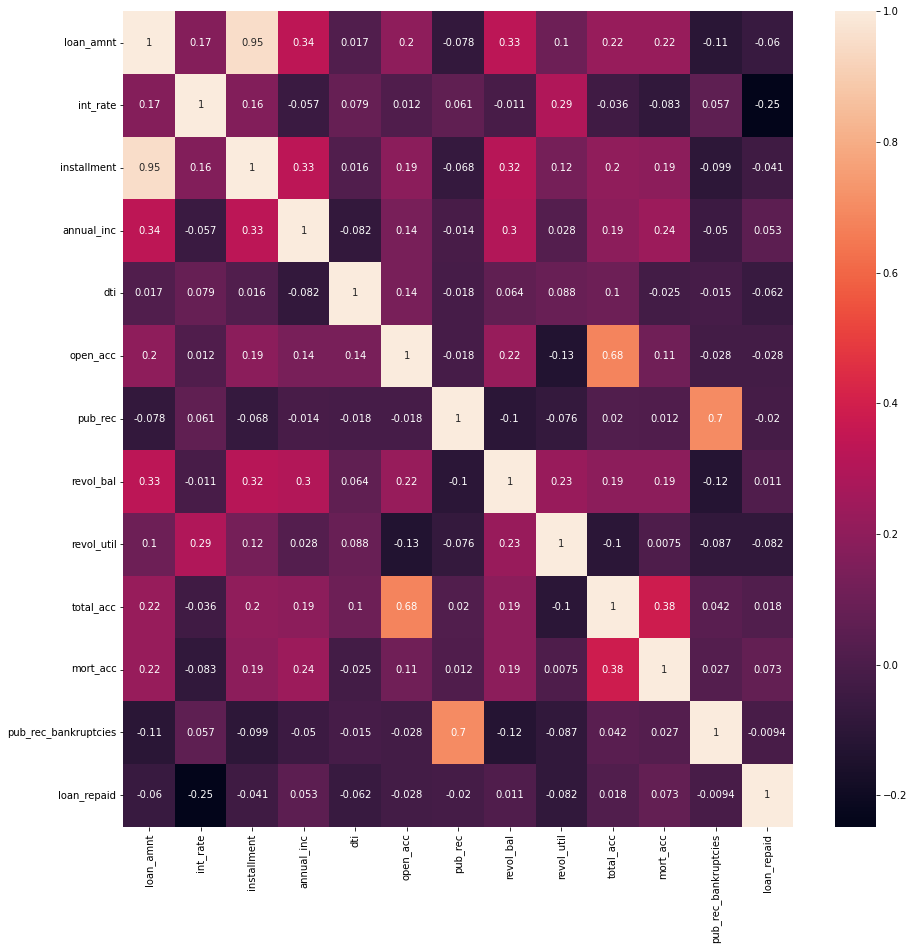

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [52]:
df[['total_acc','mort_acc']].head()

,total_acc,mort_acc
0,25.0,0.0
1,27.0,3.0
2,26.0,0.0
3,13.0,0.0
4,43.0,1.0


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [53]:
print('Mean of mort_acc column per total_acc')
df.groupby('total_acc')['mort_acc'].mean()

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
print('Mean of mort_acc column per total_acc')

Mean of mort_acc column per total_acc


**NOTE: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe)

In [55]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [56]:
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [57]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [58]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**NOTE: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [59]:
df = df.dropna()

In [60]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## 3.2 Explore Categorical Features 

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**


In [61]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**NOTE: We will convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [62]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [63]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [64]:
df['term'] = df['term'].map({' 36 months' : 36 , ' 60 months' : 60})

In [65]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [66]:
# we create a cat_column_list to store categoric columns to be able to convert them dummy variales at once.
cat_column_list = []

### grade feature

**NOTE: We already know grade is part of sub_grade, so we will just drop the grade feature.**

In [67]:
df.drop('grade', axis=1, inplace=True)

In [68]:
cat_column_list.append('sub_grade')
cat_column_list

['sub_grade']

### verification_status, application_type,initial_list_status,purpose 
**NOTE: We will convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables.**

In [69]:
cat_column_list.extend(['verification_status', 'application_type','initial_list_status','purpose'])
cat_column_list

['sub_grade',
 'verification_status',
 'application_type',
 'initial_list_status',
 'purpose']

### home_ownership
**NOTE:We will review the value_counts for the home_ownership column.**

In [70]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**NOTE: We will convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER.**

In [71]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [72]:
cat_column_list.append('home_ownership')

### address
**NOTE: We will apply feature engineering to extract  zip code from the address in the data set. Than we will convert zip_code to dummy variables and drop address**

In [73]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [74]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [75]:
df = df.drop('address',axis=1)

In [76]:
cat_column_list.append('zip_code')

### issue_d 

**NOTE: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [77]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. We will extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [78]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

## 3.3 Convert Categoric Features to Numeric 

In [79]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid,zip_code,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1,22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,1,05113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,1,05113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,1,00813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,0,11650,1999


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  open_acc              395219 non-null  float64
 12  pub_rec               395219 non-null  float64
 13  revol_bal             395219 non-null  float64
 14  revol_util            395219 non-null  float64
 15  

In [81]:
cat_column_list

['sub_grade',
 'verification_status',
 'application_type',
 'initial_list_status',
 'purpose',
 'home_ownership',
 'zip_code']

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'zip_code', 'earliest_cr_year'],
      dtype='object')

In [83]:
X = pd.get_dummies(df.drop(['loan_status','loan_repaid'], axis=1), columns = cat_column_list, drop_first = True)
y = df['loan_repaid']

## 3.4 Train Test Split

In [84]:
# Grabbing a Sample for Training Time - for lower RAM computers or if you are not using GPU
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**NOTE:We will perform a train/test split with test_size=0.2 and a random_state of 101.**

In [85]:
X_train, X_test,  y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=101)

## 3.5 Normalizing the Data

**NOTE: We will use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [86]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Section 4: Creating the Model

In [87]:
X_train.shape

(316175, 78)

**NOTE: Build a sequential model to will be trained on the data. We have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [88]:
# CODE HERE
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [89]:
X_test_scaled.shape

(79044, 78)

In [90]:
316175/256

1235.05859375

In [91]:
model.fit(x=X_train_scaled, 
          y=y_train, 
          epochs=25,
          batch_size = 256,
          validation_data=(X_test_scaled, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 9s 6ms/step - loss: 0.2970 - val_loss: 0.2651
Epoch 2/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2653 - val_loss: 0.2630
Epoch 3/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2629 - val_loss: 0.2626
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2615 - val_loss: 0.2623
Epoch 5/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2609 - val_loss: 0.2625
Epoch 6/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2605 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2599 - val_loss: 0.2623
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2593 - val_loss: 0.2624
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2592 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.258

In [92]:
from tensorflow.keras.models import load_model

In [93]:
# save model to be able to use later on .  -- optional
# model.save('my_best_model.h5')

# Section 5: Evaluating Model Performance

**NOTE: We will plot out the validation loss versus the training loss to decide the best epoch number.**

In [94]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.297033,0.265115
1,0.265309,0.262978
2,0.262918,0.262590
3,0.261537,0.262291
4,0.260893,0.262504
5,0.260482,0.262049
6,0.259865,0.262341
7,0.259263,0.262369
8,0.259218,0.261451
9,0.258893,0.261543


<AxesSubplot:>

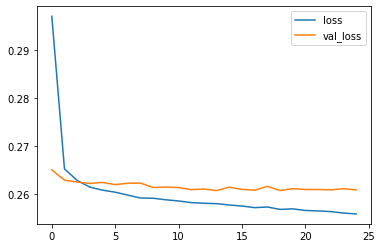

In [95]:
losses[['loss','val_loss']].plot()

**NOTE: Create predictions from the X_test_scaled set and display a classification report and confusion matrix for the X_test_scaled set.**

In [96]:
# with tf 2.6 predict_classes removed
# y_pred = model.predict_classes(X_test)

In [97]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.round(y_pred_prob)

2471/2471 [==============================] - 5s 2ms/step


In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [99]:
confusion_matrix(y_test,y_pred)

array([[ 6810,  8848],
       [   63, 63323]], dtype=int64)

In [100]:
# NOTE: if we say 1 to all of records we will already get aprox. 80 percentage so 88 acc is not so good
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

**NOTE : we can check f1_score -- harmonic mean of precision and recall -- for the rare class which is 0 here.
f1_score for class 0 is 0.61 and it is not so good you can try adding more layer or different hyperparameter tuning**

# Section 6 : Prediction

**TASK: Given the customer below, would you offer this person a loan?**

In [101]:
import random
random.seed(101)
random_ind = random.randint(0,len(X_test))

new_customer = X_test.iloc[random_ind]
new_customer

loan_amnt                              10000.000000
term                                      36.000000
int_rate                                  10.250000
installment                              323.850000
annual_inc                             35300.000000
dti                                       16.960000
open_acc                                   7.000000
pub_rec                                    1.000000
revol_bal                               4126.000000
revol_util                                48.500000
total_acc                                 29.000000
mort_acc                                   2.231043
pub_rec_bankruptcies                       1.000000
earliest_cr_year                        1992.000000
sub_grade_A2                               0.000000
sub_grade_A3                               0.000000
sub_grade_A4                               0.000000
sub_grade_A5                               0.000000
sub_grade_B1                               0.000000
sub_grade_B2

In [102]:
y_pred_prob = model.predict(new_customer.values.reshape(1,78))
y_pred = np.round(y_pred_prob)

1/1 [==============================] - 0s 26ms/step


**Now we will check, did this person actually end up paying back their loan?**

In [107]:
y_test.iloc[random_ind]

1

# THE END 